/Users/boecking/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# EXPERIMENTS
- as training data increases, how long into the future is forecast reliable
- Error plots


In [42]:
import matplotlib.pyplot as plt
plt.style.use(u'seaborn-whitegrid')
%matplotlib inline

In [84]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(u'seaborn-whitegrid')
warnings.filterwarnings("ignore")

fname = 'data%d.npy'%3
print fname
data = np.load(fname)
tstart = 10
tend = 60
horizon = 60
param = (3,0)
results = np.empty([tend-tstart, horizon])
results[:] = np.nan
prevparams = None
for i in range(tstart,tend):
    try:
        model = sm.tsa.VARMAX(data[:i],order =(param),
                              error_cov_type = 'diagonal',
                              measurement_error=True,
                              enforce_stationarity=False,
                             enforce_invertibility=False)
        if not prevparams is None:
            model.update(prevparams)
        modelresult = model.fit(disp=False)
        prevparams = modelresult.params
    except:
        continue
    preds = modelresult.forecast(horizon)
    eucl_dist = np.sqrt(np.sum((preds-data[i:i+horizon])**2,1))#2-norm
    results[i-tstart,:] = eucl_dist
    

data3.npy


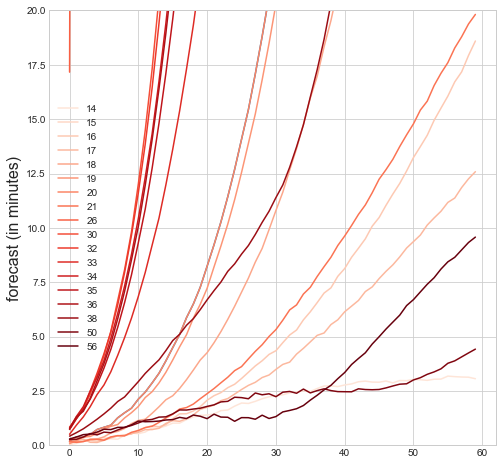

In [85]:
numres = sum(np.isnan(results).sum(1)==0)
colors = np.r_[np.linspace(0.1, 1, numres), np.linspace(0.1, 1, numres)] 
mymap = plt.get_cmap("Reds")
# get the colors from the color map
my_colors = mymap(colors)

plt.figure(figsize=(8,8))
plt.plot(results[10])
count = 0
for i,row in enumerate(results):
    if np.isnan(row).sum()==0:
            plt.plot(row,label='%d'%(i+tstart),color=my_colors[count])
            count+=1
plt.ylim(0,20)
plt.ylabel('euclidean distance', fontsize=16)
plt.ylabel('forecast (in minutes)', fontsize=16)
plt.legend()
plt.show()

In [62]:


results[12]<0

array([False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True])

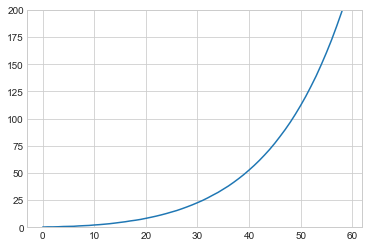

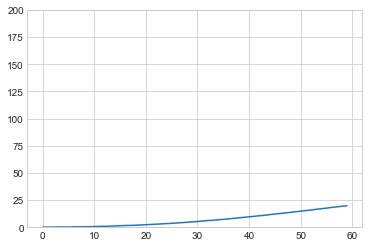

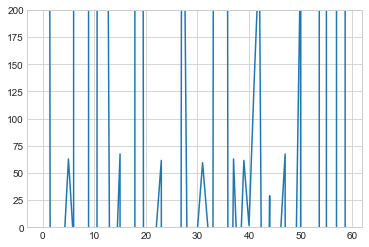

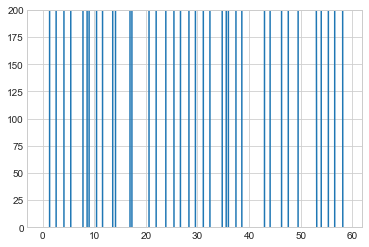

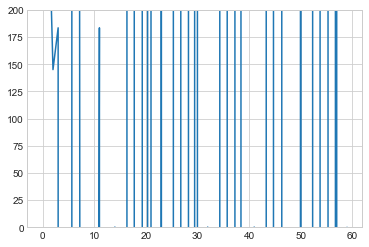

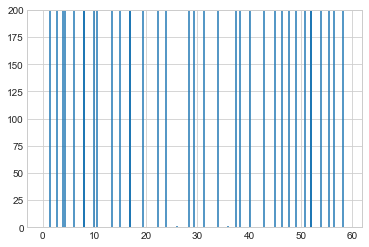

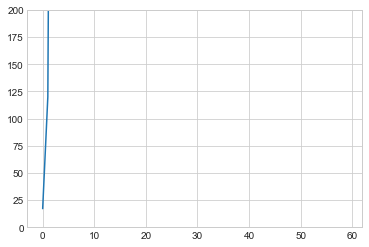

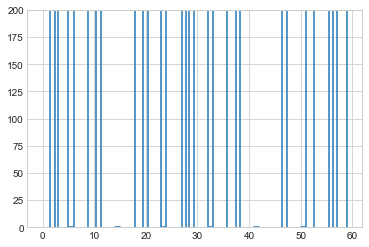

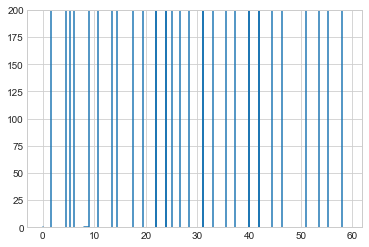

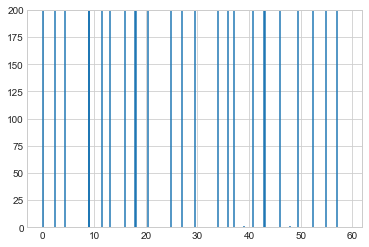

In [57]:
for i in range(10,20):
    plt.plot(results[i])
    plt.ylim(0,200)
    plt.show()

In [28]:
%timeit np.linalg.norm((preds-data[i:i+horizon]),2,1)

The slowest run took 7.72 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.58 µs per loop


In [46]:
fname = 'data%d.npy'%3
print fname
data = np.load(fname)
tstart = 10
tend = 60
horizon = 60
param = (3,0)
results = np.empty([tend-tstart, horizon,3])

data3.npy


In [39]:
i=10
model = sm.tsa.VARMAX(data[:i],order =(param),
                              error_cov_type = 'diagonal',
                              measurement_error=True,
                              enforce_stationarity=False,
                             enforce_invertibility=False)
modelresult = model.fit(disp=False)

In [42]:
preds = modelresult.forecast(horizon)

In [47]:
results = np.empty([tend-tstart, horizon,3])
results[i,:,:]=preds


# VARMAX

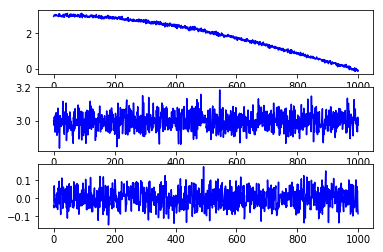

In [17]:
data
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(data[:,i],color='b')

In [2]:
warnings.filterwarnings("ignore")
def fit_modelsVARMAX(data,t_train=500,horizon=100,pds = [(1,0),(0,1),(1,1),(2,1),(2,3),(0,5)]):
    best = [None,None,np.infty]
    for param in pds:
        mse = np.infty
        try:
            model = sm.tsa.VARMAX(data[:t_train-horizon],order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = model.fit(disp=False)
            #np.isnan(results.aic)
            #print('VARMAX{} - AIC:{}'.format(param, results.aic))
            mse = np.sum((results.forecast(horizon)-data[t_train-horizon:t_train])**2,1).mean()
            print 'VARMAX{} mse: {}'.format(param,mse)
            if mse<best[2]:
                model = sm.tsa.VARMAX(data[:t_train],order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
                results = model.fit(disp=False)
                best = [results,param,mse]
        except:
            print 'error {}'.format(param)
            continue
    #fit final model
    #param = best[0]
    #model = sm.tsa.VARMAX(data[:t_train],order =(param),
    #              enforce_stationarity=False,
    #             enforce_invertibility=False)
    #results = model.fit(disp=False)
    #return [results,param,best[1]]
    return best

data1.npy
VARMAX(0, 1) mse: 654225.175876
VARMAX(0, 2) mse: 650940.232675
VARMAX(0, 3) mse: 646492.150067
error (1, 0)
error (1, 1)
error (1, 2)
error (1, 3)
VARMAX(2, 0) mse: 0.00764372725852
error (2, 0)
VARMAX(2, 1) mse: 0.00785981601093
error (2, 1)
VARMAX(2, 2) mse: 0.00863432182904
error (2, 2)
VARMAX(2, 3) mse: 0.008022763751
error (2, 3)
VARMAX(3, 0) mse: 0.00781989722433
VARMAX(3, 1) mse: 0.0078792096441
VARMAX(3, 2) mse: 0.00804658574371
VARMAX(3, 3) mse: 0.00837895074082
best params: (3, 0)


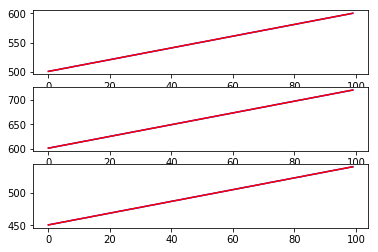

data2.npy
VARMAX(0, 1) mse: 0.293555054976
VARMAX(0, 2) mse: 0.22450126116
VARMAX(0, 3) mse: 0.260749228593
error (1, 0)
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(2, 0) mse: nan
VARMAX(2, 1) mse: inf
error (2, 2)
error (2, 3)
VARMAX(3, 0) mse: 0.0816903510927
error (3, 0)
error (3, 1)
VARMAX(3, 2) mse: 0.0823765104577
error (3, 2)
error (3, 3)
best params: (0, 2)


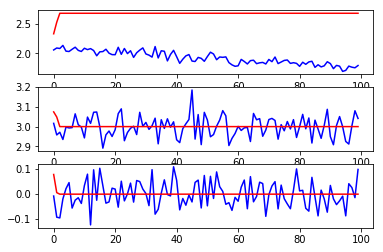

data3.npy
VARMAX(0, 1) mse: 6.45143169728
VARMAX(0, 2) mse: 6.39967842379
VARMAX(0, 3) mse: 6.40150182664
VARMAX(1, 0) mse: 0.0275267741211
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(2, 0) mse: 0.0138896865661
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
VARMAX(3, 0) mse: 0.0126948692383
error (3, 1)
error (3, 2)
VARMAX(3, 3) mse: 3.3891726119e+11
best params: (3, 0)


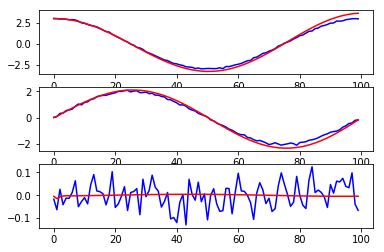

data4.npy
VARMAX(0, 1) mse: 8.47325453162
VARMAX(0, 2) mse: 8.47561798842
VARMAX(0, 3) mse: 8.48292772724
VARMAX(1, 0) mse: 0.180033432151
error (1, 1)
VARMAX(1, 2) mse: inf
VARMAX(1, 3) mse: 5.75158227808e+275
VARMAX(2, 0) mse: 0.0121308242706
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
VARMAX(3, 0) mse: 0.0108918565394
VARMAX(3, 1) mse: nan
VARMAX(3, 2) mse: 0.0107707023596
error (3, 3)
best params: (3, 2)


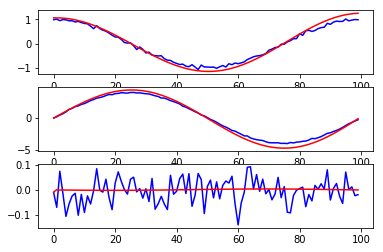

data5.npy
VARMAX(0, 1) mse: 1.01265139519
VARMAX(0, 2) mse: 1.01330207989
VARMAX(0, 3) mse: 1.01331781648
VARMAX(1, 0) mse: 1.03896677169
VARMAX(1, 1) mse: 1.03719056054
VARMAX(1, 2) mse: 1.01148141392
VARMAX(1, 3) mse: 0.997468356087
VARMAX(2, 0) mse: 1.03257609748
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: 0.983943095165
VARMAX(3, 0) mse: 0.950971851084
VARMAX(3, 1) mse: 0.942709422475
error (3, 2)
error (3, 3)
best params: (3, 1)


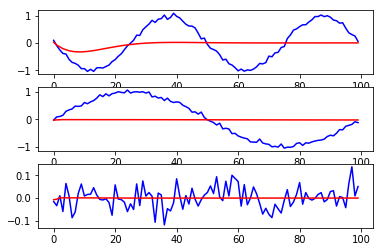

data6.npy
VARMAX(0, 1) mse: 2.5198200553
VARMAX(0, 2) mse: 2.52026033727
VARMAX(0, 3) mse: 2.52108308345
VARMAX(1, 0) mse: 2.64015308284
VARMAX(1, 1) mse: 2.61839394048
VARMAX(1, 2) mse: 2.63953694463
VARMAX(1, 3) mse: 2.55356461203
VARMAX(2, 0) mse: 2.43154870897
error (2, 1)
error (2, 2)
error (2, 3)
VARMAX(3, 0) mse: 2.03677505796e+105
VARMAX(3, 1) mse: 0.501412236883
VARMAX(3, 2) mse: 5.1447689233e+89
error (3, 3)
best params: (3, 1)


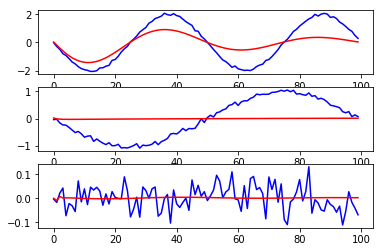

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    [results,params,mse] = fit_modelsVARMAX(data,horizon=horizon,t_train=t_train,pds=pds)
    print 'best params: {}'.format(params)
    tmpdata = data[t_train:t_train+horizon]
    preds = results.forecast(100)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(preds[:,i],color='r')
    plt.show()

# ARIMA

In [4]:
from pyramid.arima import auto_arima
def fit_modelsARIMA(data,t_train=500,start_p=0, start_q=0, max_p=4, max_q=4,max_d=3):
    stepwise_fit0 = auto_arima(data[:t_train,0], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                          start_P=1, seasonal=False, d=None, D=None, trace=False,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)
    stepwise_fit1 = auto_arima(data[:t_train,1], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                      start_P=1, seasonal=False, d=None, D=None, trace=False,
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True)
    stepwise_fit2 = auto_arima(data[:t_train,2], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                  start_P=1, seasonal=False, d=None, D=None, trace=False,
                  error_action='ignore',  # don't want to know if an order does not work
                  suppress_warnings=True,  # don't want convergence warnings
                  stepwise=True)
    return [stepwise_fit0,stepwise_fit1,stepwise_fit2]


from pyramid.arima import auto_arima
def fit_modelsARIMASeasonal(data,t_train=500,start_p=0, start_q=0, max_p=4, max_q=4,max_d=3):
    stepwise_fit0 = auto_arima(data[:t_train,0], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                          start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)
    stepwise_fit1 = auto_arima(data[:t_train,1], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                      start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                      error_action='ignore',  # don't want to know if an order does not work
                      suppress_warnings=True,  # don't want convergence warnings
                      stepwise=True)
    stepwise_fit2 = auto_arima(data[:t_train,2], start_p=start_p, start_q=start_q,max_d=max_d, max_p=max_p, max_q=max_q, 
                  start_P=1, seasonal=True,m=2, d=None, D=None, trace=False,
                  error_action='ignore',  # don't want to know if an order does not work
                  suppress_warnings=True,  # don't want convergence warnings
                  stepwise=True)
    return [stepwise_fit0,stepwise_fit1,stepwise_fit2]

data1.npy


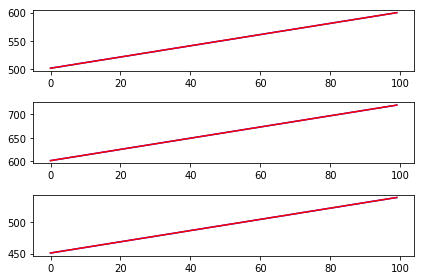

data2.npy


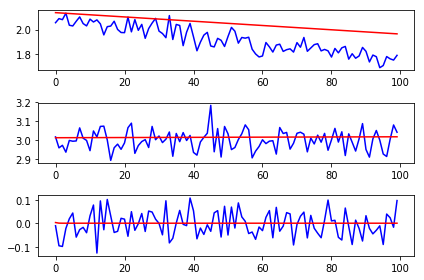

data3.npy


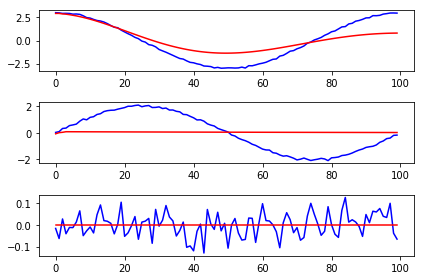

data4.npy


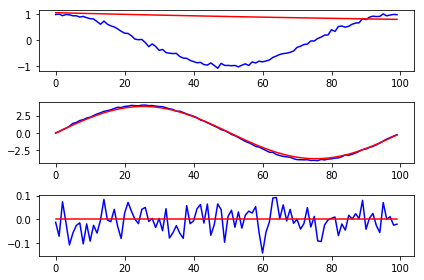

data5.npy


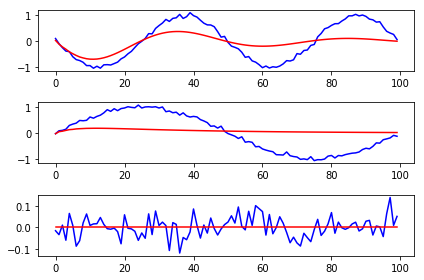

data6.npy


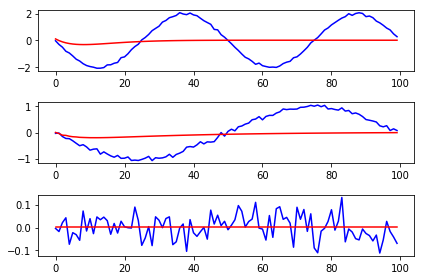

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    stepwise_fits= fit_modelsARIMA(data,t_train=t_train)
    tmpdata = data[t_train:t_train+horizon]
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(stepwise_fits[i].predict(n_periods=horizon),color='r')
    plt.tight_layout()
    plt.show()

data1.npy


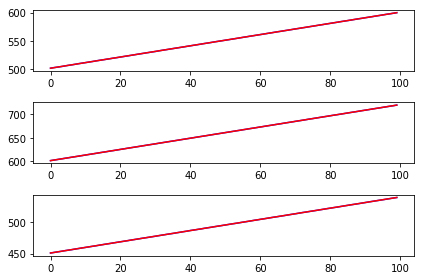

data2.npy


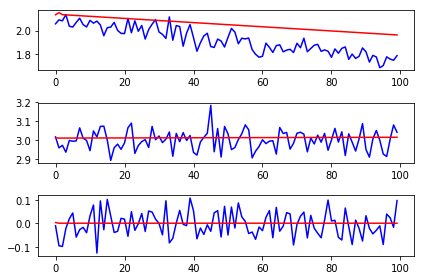

data3.npy


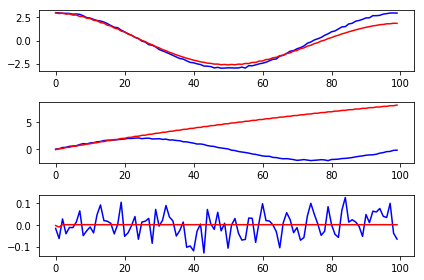

data4.npy


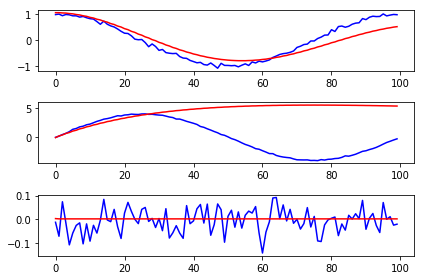

data5.npy


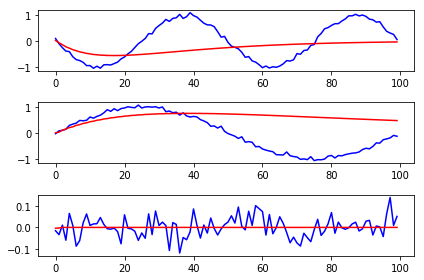

data6.npy


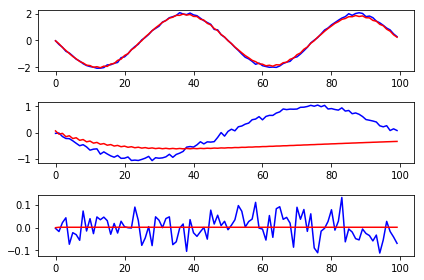

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 4), range(0, 4)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    stepwise_fits= fit_modelsARIMASeasonal(data,t_train=t_train)
    tmpdata = data[t_train:t_train+horizon]
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(stepwise_fits[i].predict(n_periods=horizon),color='r')
    plt.tight_layout()
    plt.show()

# Dynamic Factor Models 

In [7]:
# Dynamic Factor Models
warnings.filterwarnings("ignore")
def fit_modelsDFM(data,t_train=500,horizon=100,factors = [(1,0),(0,1),(1,1),(2,1),(2,3),(0,5)]):
    best = [None,np.infty]
    for param in factors:
        mse = np.infty
        try:
            #error_cov_type : {‘scalar’, ‘diagonal’, ‘unstructured’}
            model = sm.tsa.DynamicFactor(data[:t_train-horizon],k_factors=param[0], factor_order=param[1],
                                  enforce_stationarity=False,
                                 error_cov_type='diagonal')
            results = model.fit(disp=False)
            #np.isnan(results.aic)
            #print('VARMAX{} - AIC:{}'.format(param, results.aic))
            mse = np.sum((results.forecast(horizon)-data[t_train-horizon:t_train])**2,1).mean()
            print 'VARMAX{} mse: {}'.format(param,mse)
            if mse<best[1]:
                best = [param,mse]
        except:
            print 'error {}'.format(param)
            continue
    #fit final model
    param = best[0]
    model = sm.tsa.DynamicFactor(data[:t_train],k_factors=param[0], factor_order=param[1],
                  enforce_stationarity=False,
                 error_cov_type='diagonal')
    results = model.fit(disp=False)
    return [results,param,best[1]]

data1.npy
VARMAX(0, 1) mse: 654225.175876
VARMAX(0, 2) mse: 650940.232675
VARMAX(0, 3) mse: 646492.150067
VARMAX(0, 4) mse: 642817.211201
error (1, 0)
error (1, 1)
error (1, 2)
error (1, 3)
error (1, 4)
VARMAX(2, 0) mse: 0.00764372725852
error (2, 0)
VARMAX(2, 1) mse: 0.00785981601093
error (2, 1)
VARMAX(2, 2) mse: 0.00863432182904
error (2, 2)
VARMAX(2, 3) mse: 0.008022763751
error (2, 3)
VARMAX(2, 4) mse: 3.2476808544
error (2, 4)
VARMAX(3, 0) mse: 0.00781989722433
VARMAX(3, 1) mse: 0.0078792096441
VARMAX(3, 2) mse: 0.00804658574371
VARMAX(3, 3) mse: 0.00837895074082
VARMAX(3, 4) mse: 0.00827853288286
VARMAX(4, 0) mse: 0.00812882083694
VARMAX(4, 1) mse: 0.00814976204749
VARMAX(4, 2) mse: 0.00820492622488
VARMAX(4, 3) mse: 0.00827679149847
VARMAX(4, 4) mse: 0.00842163386735
best params: (3, 0)


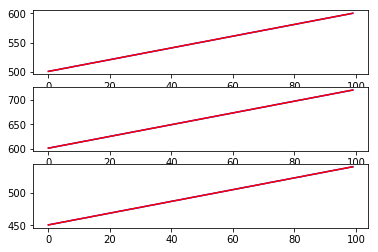

data2.npy
VARMAX(0, 1) mse: 0.293555054976
VARMAX(0, 2) mse: 0.22450126116
VARMAX(0, 3) mse: 0.260749228593
VARMAX(0, 4) mse: 0.133183165373
error (1, 0)
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
error (1, 4)
VARMAX(2, 0) mse: nan
VARMAX(2, 1) mse: inf
error (2, 2)
error (2, 3)
error (2, 4)
VARMAX(3, 0) mse: 0.0816903510927
error (3, 0)
error (3, 1)
VARMAX(3, 2) mse: 0.0823765104577
error (3, 2)
error (3, 3)
error (3, 4)
error (4, 0)
error (4, 1)
error (4, 2)
error (4, 3)
error (4, 4)
best params: (0, 4)


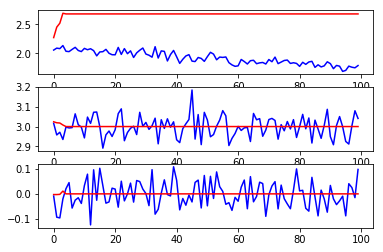

data3.npy
VARMAX(0, 1) mse: 6.45143169728
VARMAX(0, 2) mse: 6.39967842379
VARMAX(0, 3) mse: 6.40150182664
VARMAX(0, 4) mse: 6.29231321957
VARMAX(1, 0) mse: 0.0275267741211
error (1, 1)
error (1, 2)
VARMAX(1, 3) mse: inf
VARMAX(1, 4) mse: 0.184088166302
VARMAX(2, 0) mse: 0.0138896865661
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
error (2, 4)
VARMAX(3, 0) mse: 0.0126948692383
error (3, 1)
error (3, 2)
VARMAX(3, 3) mse: 3.3891726119e+11
error (3, 4)
VARMAX(4, 0) mse: 0.011904256961
VARMAX(4, 1) mse: 0.0140381029404
error (4, 2)
error (4, 3)
error (4, 4)
best params: (4, 0)


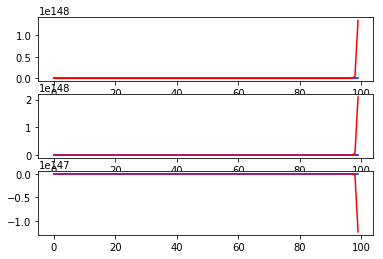

data4.npy
VARMAX(0, 1) mse: 8.47325453162
VARMAX(0, 2) mse: 8.47561798842
VARMAX(0, 3) mse: 8.48292772724
VARMAX(0, 4) mse: 8.46040372072
VARMAX(1, 0) mse: 0.180033432151
error (1, 1)
VARMAX(1, 2) mse: inf
VARMAX(1, 3) mse: 5.75158227808e+275
VARMAX(1, 4) mse: 1.32944319338e+94
VARMAX(2, 0) mse: 0.0121308242706
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: inf
error (2, 4)
VARMAX(3, 0) mse: 0.0108918565394
VARMAX(3, 1) mse: nan
VARMAX(3, 2) mse: 0.0107707023596
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 0.0130697311746
VARMAX(4, 1) mse: 0.0121547591122
VARMAX(4, 2) mse: 0.0151640797425
error (4, 3)
error (4, 4)
best params: (3, 2)


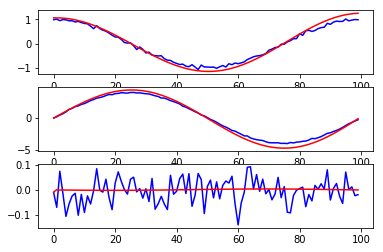

data5.npy
VARMAX(0, 1) mse: 1.01265139519
VARMAX(0, 2) mse: 1.01330207989
VARMAX(0, 3) mse: 1.01331781648
VARMAX(0, 4) mse: 1.01373119055
VARMAX(1, 0) mse: 1.03896677169
VARMAX(1, 1) mse: 1.03719056054
VARMAX(1, 2) mse: 1.01148141392
VARMAX(1, 3) mse: 0.997468356087
VARMAX(1, 4) mse: 0.992189096962
VARMAX(2, 0) mse: 1.03257609748
error (2, 1)
error (2, 2)
VARMAX(2, 3) mse: 0.983943095165
VARMAX(2, 4) mse: 0.957563327294
VARMAX(3, 0) mse: 0.950971851084
VARMAX(3, 1) mse: 0.942709422475
error (3, 2)
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 0.702555017478
error (4, 1)
error (4, 2)
error (4, 3)
error (4, 4)
best params: (4, 0)


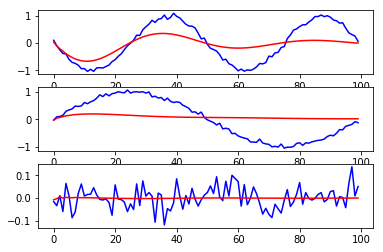

data6.npy
VARMAX(0, 1) mse: 2.5198200553
VARMAX(0, 2) mse: 2.52026033727
VARMAX(0, 3) mse: 2.52108308345
VARMAX(0, 4) mse: 2.52275486591
VARMAX(1, 0) mse: 2.64015308284
VARMAX(1, 1) mse: 2.61839394048
VARMAX(1, 2) mse: 2.63953694463
VARMAX(1, 3) mse: 2.55356461203
VARMAX(1, 4) mse: 2.53009233353
VARMAX(2, 0) mse: 2.43154870897
error (2, 1)
error (2, 2)
error (2, 3)
error (2, 4)
VARMAX(3, 0) mse: 2.03677505796e+105
VARMAX(3, 1) mse: 0.501412236883
VARMAX(3, 2) mse: 5.1447689233e+89
error (3, 3)
error (3, 4)
VARMAX(4, 0) mse: 2.02972783498e+44
error (4, 1)
VARMAX(4, 2) mse: 0.815177304459
error (4, 3)
VARMAX(4, 4) mse: 0.765901433884
best params: (3, 1)


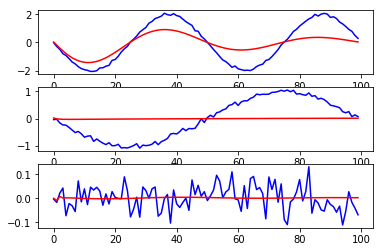

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

t_train=500
horizon=100
# Generate all different combinations for parameters
pds= list(itertools.product(range(0, 5), range(0, 5)))
pds= pds[1:]#remove tuple of zeros

for _d in range(1,7):
    fname = 'data%d.npy'%_d
    print fname
    data = np.load(fname)
    [results,params,mse] = fit_modelsVARMAX(data,horizon=horizon,t_train=t_train,pds=pds)
    print 'best params: {}'.format(params)
    tmpdata = data[t_train:t_train+horizon]
    preds = results.forecast(100)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(tmpdata[:,i],color='b')
        plt.plot(preds[:,i],color='r')
    plt.show()

# Prophet

In [10]:
from fbprophet import Prophet

# data as demonstrator

In [ ]:
#https://github.com/arunvenk/DaD

# RUN

In [19]:
from models import Ellipse
import warnings
import itertools
import numpy as np
import statsmodels.api as sm

warnings.filterwarnings("ignore")
def fit_modelsVARMAX(data,t_test=100,pds = None):
    if pds is None:
        pds = list(itertools.product(range(0, 5), range(0, 5)))
    best = []
    for param in pds:
        mse = np.infty
        try:
            model = sm.tsa.VARMAX(data[:-t_test],order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = model.fit(disp=False)
            mse = np.sum((results.forecast(t_test)-data[-t_test:])**2,1).mean()
            best.append((param,mse))
        except:
            continue
    best.sort(key=lambda x: x[1])
    return_arg = None
    #fit final model
    for tup in best:
        param = tup[0]
        try:
            model = sm.tsa.VARMAX(data,order =(param),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = model.fit(disp=False)
            return_arg = [results,param]
            break
        except:
            #try next best
            continue
    return return_arg


def main():
    #generate data from desired model
    data = Ellipse(a=2,b=1).generate_data(N=1000)
    #assume first i_seen datapoints have been observed
    i_seen = 300
    training = data[:i_seen]
    observations = data[i_seen:]

    #fit model
    model = fit_modelsVARMAX(training,t_test=int(i_seen/4))
    #forecast:
    preds = model.forecast(100)

In [30]:
data[-100:].shape

(100, 3)

In [20]:
#generate data from desired model
traj_gen = Ellipse(a=2,b=1).generator()
#assume first i_seen datapoints have been observed
i_seen = 300
train = np.vstack([next(traj_gen) for i in xrange(i_seen)])
#fit model
[model,params] = fit_modelsVARMAX(train,t_test=int(i_seen/4))

Exception RuntimeError: 'generator ignored GeneratorExit' in <generator object generator at 0x103774140> ignored


In [24]:
newmodel = sm.tsa.VARMAX(train,order =(params),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
%timeit resmodel = newmodel.fit(disp=False)

1 loop, best of 3: 5.04 s per loop


In [25]:
newmodel = sm.tsa.VARMAX(train,order =(params),
                                  enforce_stationarity=False,
                                 enforce_invertibility=False)
newmodel.update(model.params)
%timeit resmodel = newmodel.fit(disp=False)

1 loop, best of 3: 4.02 s per loop


In [31]:
#finde forecast function
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.html?highlight=mleresults
prediction_results = model.get_prediction(300, 320, False)
prediction_results.predicted_mean
prediction_results.conf_int()

,lower y1,lower y2,lower y3,upper y1,upper y2,upper y3
0,1.913122,-0.092483,-0.104324,2.102669,0.085668,0.094645
1,1.909378,-0.092941,-0.115007,2.099439,0.085856,0.085770
2,1.904774,-0.086429,-0.101647,2.095805,0.093234,0.100460
3,1.905789,-0.089202,-0.103412,2.098226,0.090761,0.102078
4,1.907190,-0.089300,-0.106528,2.099704,0.090791,0.099305
5,1.907104,-0.088904,-0.105804,2.099634,0.091200,0.100030
6,1.906552,-0.088839,-0.105367,2.099090,0.091265,0.100546
7,1.906680,-0.089028,-0.105824,2.099228,0.091077,0.100142
8,1.906754,-0.088973,-0.105948,2.099302,0.091132,0.100024
9,1.906745,-0.088938,-0.105830,2.099294,0.091167,0.100145


In [5]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [21]:
import sched, time
scheduler = sched.scheduler(time.time, time.sleep)
data = []
def get_prediction(generator): 
    print 'gen'
    next(generator)
    # do your stuff
    scheduler.enter(1, 0, get_prediction, (generator,))

s.enter(1, 0, do_something, (traj_gen,))
s.run()
for x in data:
    print x

gen
gen
gen
gen
gen
gen
gen


KeyboardInterrupt: 

In [ ]:
import numpy as np
class Model(object):
    def compute_step(self, p, i):
        print('ERROR UNIMPLEMENTED')
    def generate_data(self, N):
        p = np.array([0, 0, 0])
        data = np.zeros((N, 3))
        for i in range(N):
            p = self.compute_step(p, i)
            data[i, :] = p + np.random.normal(0, 0.05, size=(1, 3))
        return data

    def generator(self):
        p = np.array([0.0, 0.0, 0.0])
        #try:
        i=0
        while True:
            p = self.compute_step(p, i)
            yield p + np.random.normal(0, 0.05, size=(1, 3))
        #except:
        #    yield p
        #    print('Generator exited')

class LinearModel(Model):
    def __init__(self, direction):
        self.direction = np.array(direction)
    def compute_step(self, p, i):
        q = np.copy(p)
        q = q + self.direction
        return q

class Ellipse(Model):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def compute_step(self, p, i):
        theta = i*np.pi*2.0/100.0
        q = np.array([self.a*np.cos(theta), self.b*np.sin(theta), 0])
        return q
